In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
tf.random.set_seed(42)

In [4]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

img, label = x_train[10], y_train[10]

# Normalize images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Label encode
y_train = np.reshape(y_train, -1,)
y_test = np.reshape(y_test, -1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def show(x_train, y_train, index):
  plt.imshow(x_train[index])
  plt.xlabel(classes[y_train[index]])

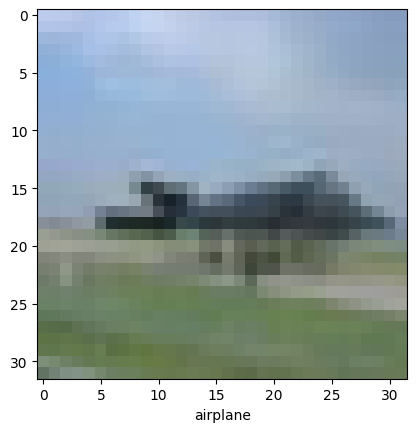

In [7]:
show(x_train, y_train, 600)

In [8]:
model = Sequential([
    Conv2D(100, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(200, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(108, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 100)    │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 200)    │       180,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,843,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 108)            │        27,756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 108)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,055,302 (7.84 MB)

 Trainable params: 2,055,302 (7.84 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks = [early_stopping]
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7461 - loss: 0.7410 - val_accuracy: 0.7338 - val_loss: 0.7952
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7503 - loss: 0.7315 - val_accuracy: 0.7424 - val_loss: 0.7668
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7523 - loss: 0.7162 - val_accuracy: 0.7456 - val_loss: 0.7615
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7644 - loss: 0.6855 - val_accuracy: 0.7422 - val_loss: 0.7636
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7631 - loss: 0.6909 - val_accuracy: 0.7458 - val_loss: 0.7635
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7657 - loss: 0.6785 - val_accuracy: 0.7502 - val_loss: 0.7531
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7752 - loss: 0.6553 - val_accuracy: 0.7508 - val_loss: 0.7606
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7802 - loss: 0.6479 - val_a

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - loss: 0.7395
Test accuracy: 0.7494000196456909


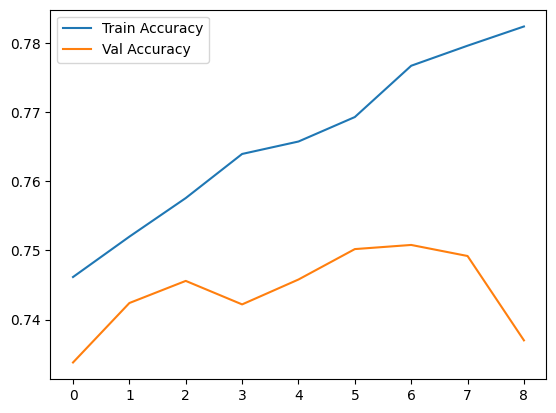

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [17]:
import numpy as np
x = 1
y = model.predict(np.expand_dims(x_test[x], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


Text(0.5, 0, 'pred : dog actual : dog')

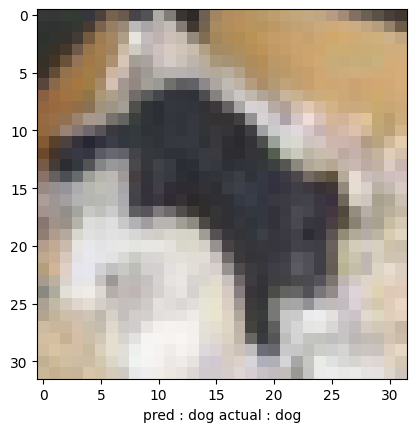

In [18]:
plt.imshow(x_test[x])
plt.xlabel(f"pred : {classes[np.argmax(y)]} actual : {classes[y_test[x]]}")

In [22]:
from PIL import Image

# Load the image from file
i_img = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

images = [Image.open(f'{i}.jpeg') for i in i_img]

# Resize image to 32x32 pixels
resized_images = [image.resize((32, 32), Image.BICUBIC) for image in images]

# Convert the resized images to numpy arrays
resized_image_arrays = [np.array(image) for image in resized_images]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step


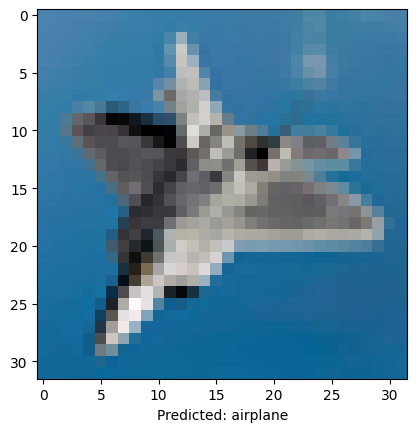

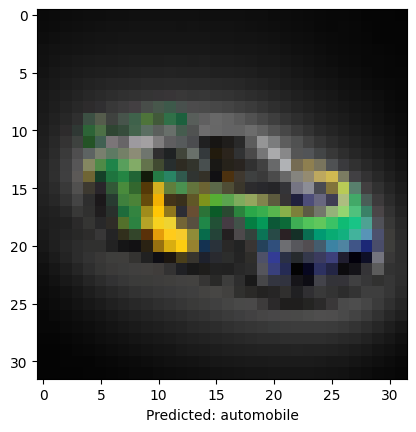

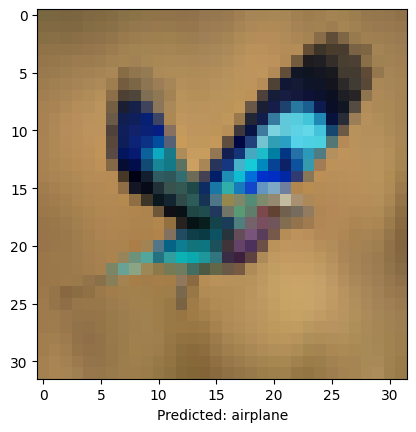

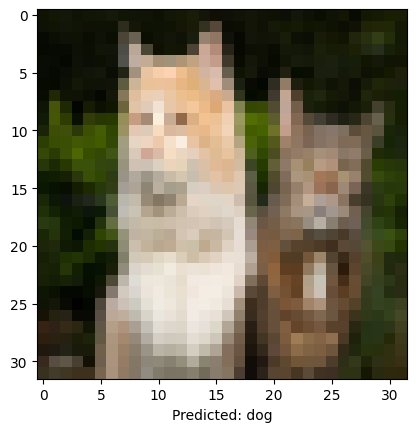

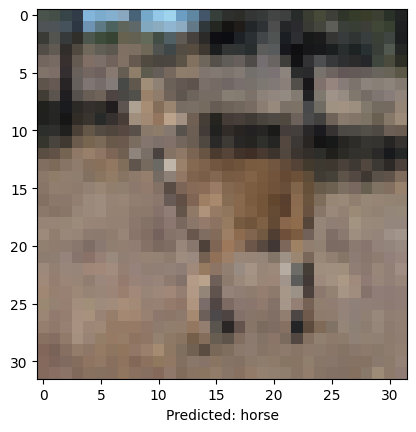

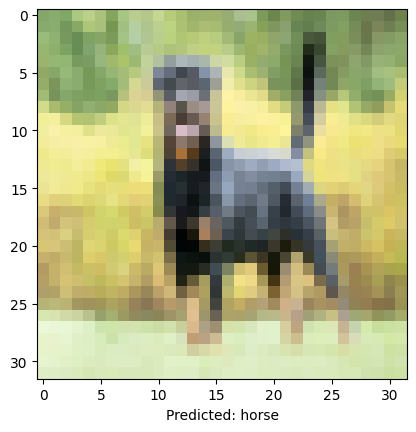

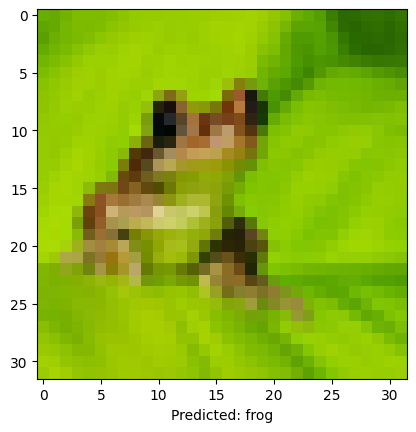

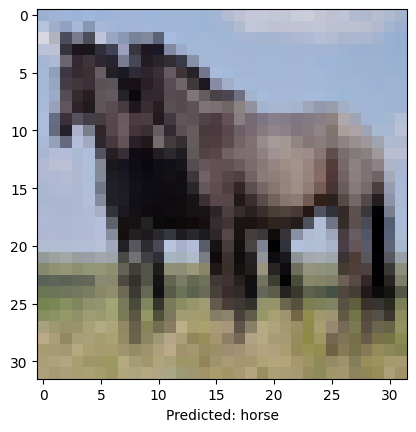

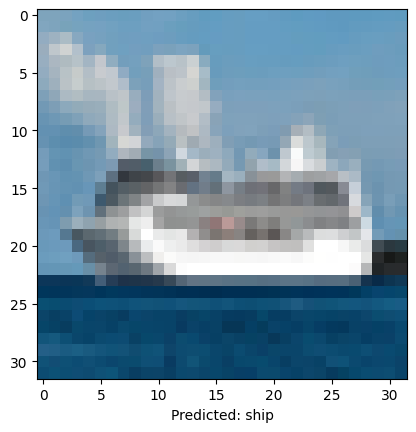

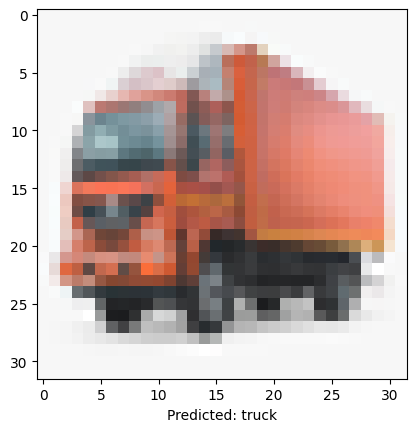

In [23]:
# Expand dimensions to match the model's input shape (add batch dimension)
resized_images_expanded = [np.expand_dims(resized_image, axis=0) for resized_image in resized_image_arrays]

# Concatenate the expanded images into a single numpy array
resized_images_batch = np.concatenate(resized_images_expanded, axis=0)

# Make a prediction
y_pred = model.predict(resized_images_batch)

# Get the predicted class index for each image
predicted_classes_index = np.argmax(y_pred, axis=1)

# Get the predicted class name
predicted_class_names = [classes[predicted_class_index] for predicted_class_index in predicted_classes_index]

# Display the image with predicted label
for i, image_array in enumerate(resized_image_arrays):
    plt.imshow(image_array)
    plt.xlabel(f"Predicted: {predicted_class_names[i]}")
    plt.show()

In [24]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, np.argmax(model.predict(x_test), axis=1)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       521
           1       0.90      0.82      0.86       514
           2       0.72      0.56      0.63       475
           3       0.57      0.50      0.53       500
           4       0.67      0.74      0.70       494
           5       0.64      0.66      0.65       522
           6       0.77      0.85      0.81       489
           7       0.77      0.81      0.79       472
           8       0.84      0.88      0.86       511
           9       0.79      0.87      0.83       502

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



In [35]:
# Save the model in the native Keras format
model.save('cifar10.keras')
model.save('cifar10.h5')

In [38]:
import zipfile

with zipfile.ZipFile('cifar10_model.zip', 'w') as zipf:
    zipf.write('cifar10.h5')

In [39]:
from google.colab import files
files.download('cifar10_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model has been saved in the native Keras format. You can download the file `cifar10.keras` from the file browser on the left sidebar.